In [3]:
import numpy as np


class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def update_weights(self, X, y, y_pred):
        self.weights -= self.lr * (1/X.shape[1]) * np.dot(X.T, (y_pred - y))

    def update_bias(self, X, y, y_pred):
        self.bias -= self.lr * (1/X.shape[1]) * np.sum(y_pred - y)

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            self.update_weights(X, y, y_pred)
            self.update_bias(X, y, y_pred)

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


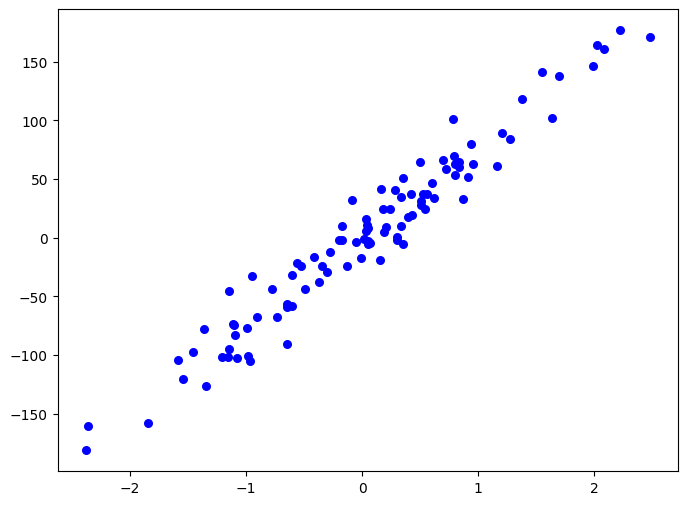

305.7741316228642


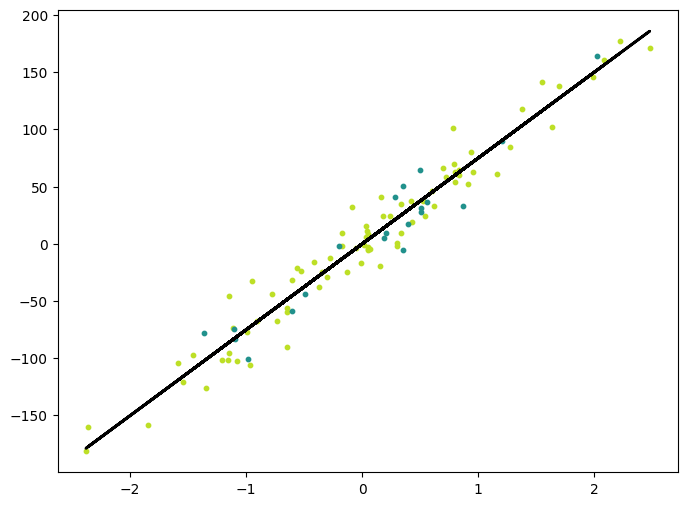

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.show()

reg = LinearRegression(lr=0.01)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)


def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)


mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()
